In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import src.paths

# Identify window to analyze

In [172]:
date = '2022-09-16'

In [179]:
behav = pd.read_pickle(src.paths.DATA / date / f'{date}-behavior.pkl')

In [180]:
X = behav.copy()
t1 = pd.date_range(start=0, periods=len(X), freq='0.8ms')
t2 = pd.date_range(start=0, periods=len(X) // 1250, freq='1s')
X = X.set_index(t1)
X = X.reindex(t2).interpolate(method='linear')
X.index = pd.Series(np.arange(len(X)), name='time')

In [181]:
X.speed.describe()

count    7201.000000
mean       15.917466
std        27.694096
min         0.019104
25%         1.063706
50%         2.061667
75%        15.018785
max       386.824575
Name: speed, dtype: float64

In [182]:
thresh = 10 # cm/s

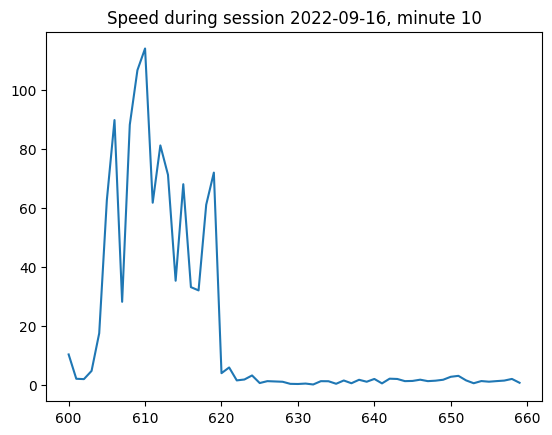

In [183]:
plt.title('Speed during session 2022-09-16, minute 10')
plt.plot(X.speed.iloc[600:660])
plt.show()

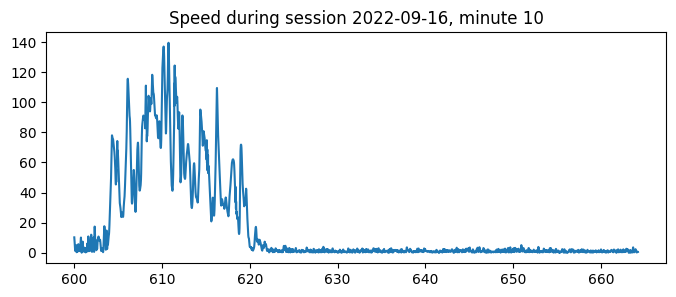

In [188]:
plt.figure(figsize=(8, 3))
plt.title('Speed during session 2022-09-16, minute 10')
plt.plot(behav.speed.iloc[1250 * 600:1258 * 660])
plt.savefig('2022-09-16-minute-10-speed.png', dpi=300)
plt.show()

# CSD

In [184]:
csd = pd.read_pickle(src.paths.DATA / date / f'{date}-hpc-csd.pkl')

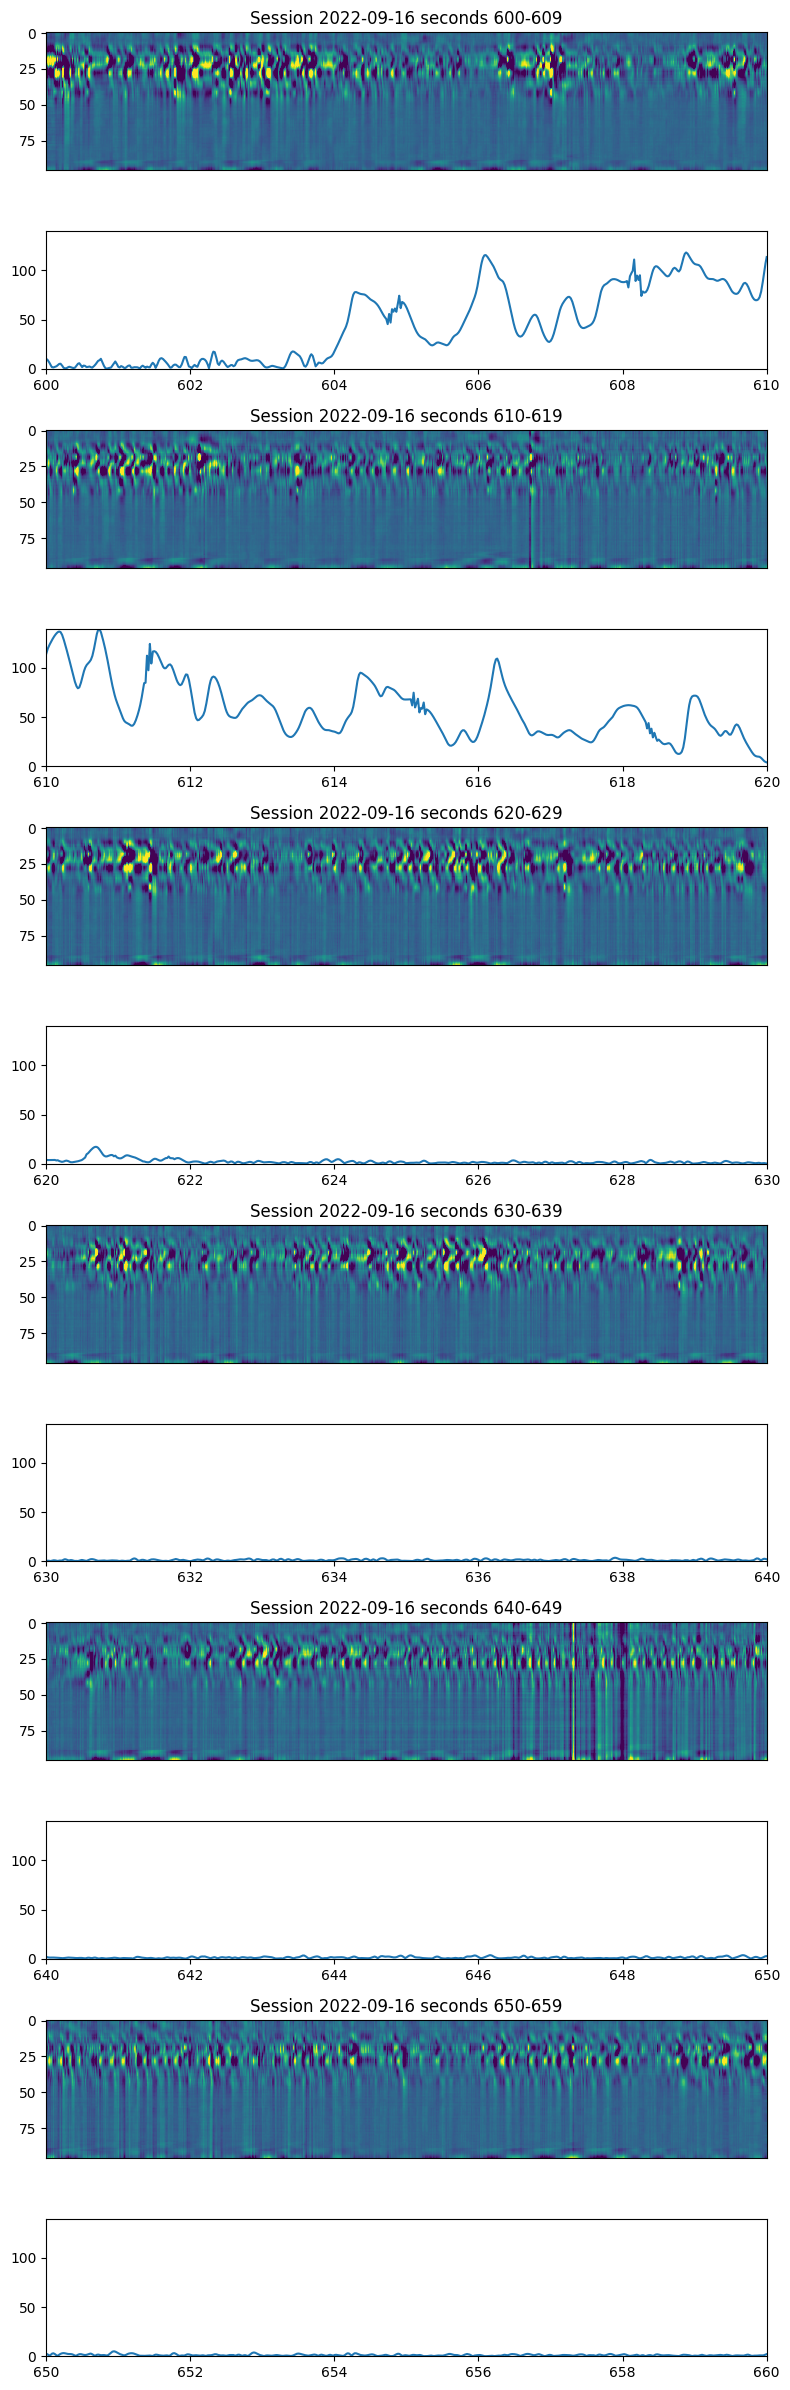

In [213]:
fig, ax = plt.subplots(12, 1, figsize=(8, 24))
for i in range(6):
    plt.sca(ax[i * 2])
    startsec = 600 + 10 * i
    endsec = 600 + 10 * (i + 1)
    plt.title(f'Session {date} seconds {startsec}-{endsec - 1}')
    im = csd.loc[startsec:endsec - 0.0008].T
    plt.imshow(im, vmin=-2500, vmax=5000)
    plt.axis('auto')
    plt.xticks([])
    plt.sca(ax[i * 2 + 1])
    plt.plot(behav.speed.loc[startsec:endsec - 0.0008])
    plt.ylim([0, 140])
    plt.xlim([startsec, endsec])
plt.tight_layout()
plt.savefig('2022-09-16-minute-10-csd-speed.png', dpi=200)
plt.show()